In [5]:
from collections import Counter
class Vocabulary:
    def __init__(self, min_freq, tokens=None, reserved_tokens=None) -> None:
        if tokens is None:
            tokens = []
        if reserved_tokens is None:
            reserved_tokens = []
        word_freq = self.count_words(tokens)
        self.token_freq = sorted(word_freq.items(), key=lambda dict_pair:dict_pair[1], reverse=True)
        self.idx_to_token = ['unk'] + reserved_tokens
        self.token_to_idx = {token:idx for idx, token in enumerate(self.idx_to_token)}
        for token, freq in self.token_freq:
            if freq < min_freq:
                break
            if token not in self.token_to_idx:
                self.idx_to_token.append(token)
                self.token_to_idx[token] = len(self.idx_to_token)-1

    def count_words(self, tokens_list):
        if len(tokens_list) == 0 or isinstance(tokens_list[0], list):
            tokens_list = [token for line in tokens_list for token in line]
        return Counter(tokens_list)
    
    def __len__(self):
        return len(self.idx_to_token)

    def __getitem__(self, tokens):
        if not isinstance(tokens, (list, tuple)):
            return self.token_to_idx.get(tokens, self.unk_idx)
        return [self.__getitem__(token) for token in tokens]


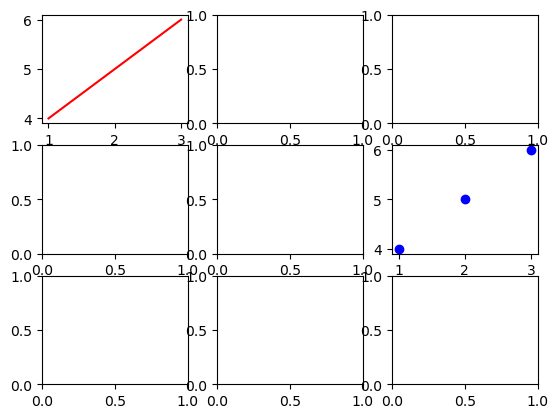

In [14]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 3)
x=[1,2,3]
y=[4,5,6]
fig.set_label('test')
axes=axes.flatten()
axes[0].plot(x, y, color='red')
axes[5].scatter(x,y, color='blue')